# Day8 機械学習モデルの構築と評価

# 学習データの分割

In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# pickleをデータフレームに復元
train = pd.read_pickle("./titanic/titanic_train.pkl")
test = pd.read_pickle("./titanic/titanic_test.pkl")
data = [train,test]

In [3]:
data[0].head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [4]:
data[1].head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,3,1,0,0,2,0,2,0
1,3,0,1,0,0,2,3,0
2,2,1,0,0,2,0,4,1
3,3,1,0,0,0,0,1,1
4,3,0,1,1,0,2,1,1


In [5]:
# 訓練データとテストデータの分割を行うライブラリをimport
from sklearn.model_selection import train_test_split

testのデータには答え（"Survived"）がついておらず、これを用いて学習器の良し悪しを確かめる術がないので、<br>
trainの一部のデータを分類器の検証用に用いることとする。<br>

train→tr_trainとtr_testに分割<br>
（tr_trainデータ数）：（tr_testのデータ数）＝7:3<br>
となるように指定する。

In [6]:
#tr_train,tr_testに振り分けられるデータはランダムに決まる
# random_state = 1234　は振り分け方を固定するための値
tr_train,tr_test=train_test_split(train, test_size=0.3, random_state = 1234) 

In [7]:
train.columns[1:]

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age_band',
       'Fare_band'],
      dtype='object')

tr_train_Xにはtr_trainの"Survived"列【以外】のデータを、<br>
tr_train_Yにはtr_trainの"Survived"列のみを、<br>
tr_test_Xにはtr_testの"Survived"列【以外】のデータを、<br>
tr_test_Yにはtr_testの"Survived"列のみを納める。<br>

In [8]:
train.columns[1:]

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age_band',
       'Fare_band'],
      dtype='object')

In [9]:
train.columns[0]

'Survived'

In [10]:
#訓練用の説明変数
tr_train_X = tr_train[train.columns[1:]]

# 訓練用の目的変数
tr_train_Y = tr_train[train.columns[0]]

# 評価用の説明変数
tr_test_X = tr_test[train.columns[1:]]

# 評価用の目的変数
tr_test_Y = tr_test[train.columns[0]]

In [11]:
tr_train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
28,3,0,0,0,2,1,0,0
270,1,1,0,0,0,0,2,3
744,3,1,0,0,0,0,2,0
73,3,1,1,0,1,0,1,1
423,3,0,1,1,0,2,1,1


In [12]:
tr_train_Y.head()

28     1
270    0
744    1
73     0
423    0
Name: Survived, dtype: int64

# モデルの構築

## 決定木

In [13]:
# sklearnの決定木をimport
from sklearn import tree

# 決定木分類器による空の分類器を生成
model=tree.DecisionTreeClassifier()

このモデルにtr_train_Xのデータを学習させ、tr_train_Yのデータを分類し判別率を算出

In [14]:
# 訓練用の説明変数,目的変数を与えて学習させる
model.fit(tr_train_X,tr_train_Y)

# 生成されたモデルを用いて、テスト用の説明変数に対する予測値を入手
predict= model.predict(tr_test_X)

判別率をsklearn.metricsを用いて見てみる

In [15]:
from sklearn import metrics

# 精度をmax 1.0で返すmatrics.accuracy_scoreを利用
# 引数にモデルにより予測された値と、実際の目的変数を与えることで正解率を計算
print('判別率：',metrics.accuracy_score(predict, tr_test_Y))

判別率： 0.7835820895522388


## ランダムフォレスト

ランダムフォレストのモデルを設定。n_estimatorは100としておく。

In [16]:
# sklearnのアンサンブル学習系ライブラリから、ランダムフォレスト分類器をimport
from sklearn.ensemble import RandomForestClassifier

# 空のモデルを生成
# 決定木の数をn_estimatorsで指定
model=RandomForestClassifier(n_estimators=300)

このモデルにtr_train_Xのデータを学習させ、tr_train_Yのデータを分類し判別率を算出

In [17]:
# 訓練用の説明変数,応答変数を与えて学習させる
model.fit(tr_train_X,tr_train_Y)

# 生成されたモデルを用いて、テスト用の説明変数に対する予測値を入手
predict= model.predict(tr_test_X)

判別率をsklearn.metricsを用いて見てみる

In [18]:
from sklearn import metrics

# 判別率を表示
# 予測結果と実際の目的変数を引数にすることで、判別率を計算
print('判別率：',metrics.accuracy_score(predict, tr_test_Y))

判別率： 0.7873134328358209


# モデルの検証

## K-分割交差検証

In [19]:
# KFold交差検証のライブラリ、交差検証のスコアを求めるライブラリ、および交差検証による予測に関するライブラリをimport
from sklearn.model_selection import KFold, cross_val_score

In [20]:
# 分割数n_splits, ランダム性の固定を行うrandom_state, データのシャッフルを行うかを指定するshuffleを引数に与える
kf=KFold(n_splits=5, random_state=30, shuffle=True)

In [21]:
# 説明変数として、trainのコラムが1以降のものを設定
x=train[train.columns[1:]]

# 目的変数として、trainの"Survived"を設定
y=train["Survived"]

# クロスバリデーションで得られるスコアを代入
# 予測に使うモデル、説明変数、目的変数、および作成したKFoldのパラメータを引数に与える
cv_result = cross_val_score(model, x, y, cv = kf)
print("cv: {}".format(cv_result))

# 分割数の分だけ精度が得られるので、平均値をとれば全体の精度が確認可能
print("平均精度：{}".format(cv_result.mean()))

cv: [0.79329609 0.7752809  0.85393258 0.80898876 0.78651685]
平均精度：0.803603038101814


## グリッドサーチ

ハイパーパラメータチューニングの最も基本的な手法

In [22]:
from sklearn.model_selection import GridSearchCV
# サーチしたいハイパーパラメータ、および探る範囲の指定
# 今回は、予測子の数を100~1000まで、100刻みで探る
param={'n_estimators':range(100,1000,100)}

# 分類器はランダムフォレストを指定
# cvに与えた数値分だけ、交差検証を行う
GS_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=param,verbose=True,cv=5)
GS_rf.fit(x,y)

print("ベストスコア：{}".format(GS_rf.best_score_))
print("最適なパラメータ：{}".format(GS_rf.best_estimator_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.5s finished


ベストスコア：0.8103254769921436
最適なパラメータ：RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


test用のデータセット(test.csv)をこのモデルに従って分類。
また、分類結果を提出する形式にまとめる(csv形式)

In [23]:
# グリッドサーチで得られたベストなモデルを用いて分類を行う
model = GS_rf.best_estimator_

# 学習
model.fit(train[train.columns[1:]] ,train[train.columns[0]])

# テストデータに対する予測
test_prediction = model.predict(test)

In [24]:
# kaggleの課題として PassengerId 892 ~ 1310 を予測することが要求されているため
# idを生成しておく
passenger_id = np.arange(892,1310)

In [25]:
# PassengerIdと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )
print(test_result.head(10))

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0


In [26]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( 'titanic_forsubmisson.csv' , index = False )

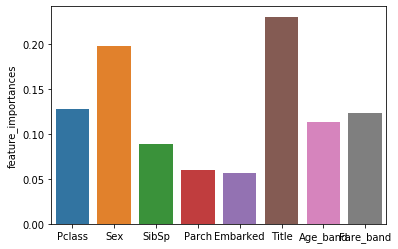

In [27]:
# 分類に用いた説明変数について、それぞれが分類に貢献した度合いをfeature_importances_で取得できる
feature_importances= pd.DataFrame({"feature_importances":model.feature_importances_})
sns.barplot(tr_train_X.columns, feature_importances["feature_importances"])
plt.show()